In [1]:
# Polynomial regression
# January 24nd, 2019 

# Importing the libraries 
import numpy as np # included for mathematical operations
import matplotlib.pyplot as plt # plot nice charts in Python 
import pandas as pd # import datasets and manage datasets 
import os # Use this for folder and file manipulation

# Importing the dataset 
os.chdir('/Users/amandahutter/Documents/PythonCode/Udemy/MachineLearningA-Z/Part 2 - Regression/Section 6 - Polynomial Regression') 
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)

X = dataset.iloc[:, 1:2].values # take all the rows, take all columns except the final one 
Y = dataset.iloc[:, 2].values


            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


Is the new employee bluffing about his salary? 
He says his salary was 160K at his old company

We can ignore the position column, do not bother to encode this. 
Use Level for Independent Variable and Salary for Dependent Variable. 

In [74]:
# No feature scaling 
# No encoding 
# No splitting dataset into Training & Test Set  

In [75]:
# Build a linear regression model, then compare with a Polynomial Regression model 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
Y_Pred = lin_reg.predict(X)
print(f"The predicted values are \n {Y_Pred}")
print(f"The real values are \n {Y}")

The predicted values are 
 [-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]
The real values are 
 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


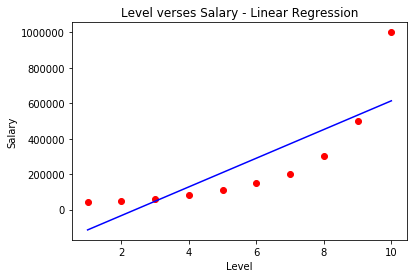

In [76]:
# Plot the linear regression model for the effect of level on salary 
plt.scatter(X, Y, color = 'red') # Adds real points 
plt.plot(X, Y_Pred, color = 'blue') # this adds line for predicted value
plt.title("Level verses Salary - Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [77]:
# Build a model for polynomial regression 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_Poly = poly.fit_transform(X) # Adds a column of Ones to the start of our matrix 

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_Poly, Y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

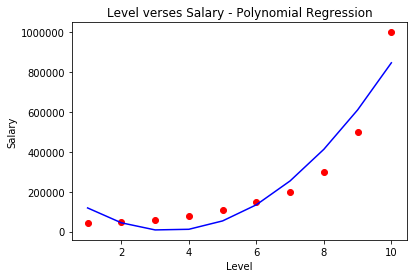

In [78]:
# Plot the polynomial model for the effect of level on salary 
plt.scatter(X, Y, color = 'red') # Adds real points 
plt.plot(X, lin_reg_2.predict(X_Poly), color = 'blue') # this adds line for predicted value
plt.title("Level verses Salary - Polynomial Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

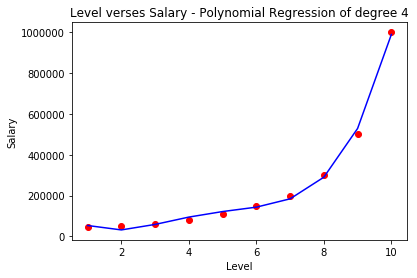

In [79]:
# Build a model for polynomial regression of Degree N 
n = 4

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = n)
X_Poly = poly.fit_transform(X) # Adds a column of Ones to the start of our matrix 

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_Poly, Y) 

# Plot the polynomial model for the effect of level on salary 
plt.scatter(X, Y, color = 'red') # Adds real points 
plt.plot(X, lin_reg_2.predict(X_Poly), color = 'blue') # this adds line for predicted value
plt.title(f"Level verses Salary - Polynomial Regression of degree {n}")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

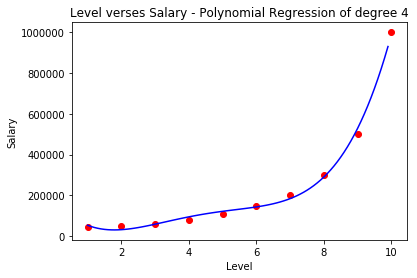

In [80]:
# Make more advanced plot to have more granularity of levels plus incremented steps between steps by resolution of 0.1

X_Grid = np.arange(min(X), max(X), 0.1) # Vector of all 10 levels, incremented by 0.1 step size 
X_Grid = X_Grid.reshape((len(X_Grid), 1 )) # Matrix of length 1 

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_Poly = poly_reg.fit_transform(X) # Adds a column of Ones to the start of our matrix 

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_Poly, Y) 

# Plot the polynomial model for the effect of level on salary 
plt.scatter(X, Y, color = 'red') # Adds real points 
plt.plot(X_Grid, lin_reg_2.predict(poly_reg.fit_transform(X_Grid)) , color = 'blue') # this adds line for predicted value
plt.title(f"Level verses Salary - Polynomial Regression of degree {n}")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

#More continuous curve 

In [81]:
# Predict a result with linear regression 
print(lin_reg.predict(6.5))

[ 330378.78787879]


In [84]:
# Predict a result with polynomial regression 
print(lin_reg_2.predict(poly_reg.fit_transform(6.5))) # we must transform our number to apply it to the model 

[ 158862.45265153]
